In [6]:
#xlsx to csv
file = 'MainData.xlsx'
from opencc import OpenCC
import numpy as np
import pandas as pd
import jieba
import jieba.analyse
import codecs
data = pd.read_excel(file,sheet_name=0)
data_title_dep = data[["detail_zh"]].copy()
data_title_dep.to_csv('MainData(Ch).csv',index=0, encoding='utf_8_sig')


In [7]:
from opencc import OpenCC
import numpy as np
import pandas as pd
import jieba
import jieba.analyse
import codecs
cc = OpenCC('s2hk')
#Data
rows=pd.read_csv('MainData(Ch).csv', header=0,encoding='utf-8',dtype=str).astype(str)

segments = []
for index, row in rows.iterrows():
    content = row[0]
    #TextRank
    words = jieba.cut(content)
    splitedStr = ''
    for word in words:
        # Count
        if len(word)>1 and word != '\r\n' and word.isdigit() == False:
            segments.append({'word':word, 'count':1})
            splitedStr += word + ' '
     
    
dfSg = pd.DataFrame(segments)


#Sum
dfWord = pd.DataFrame(dfSg.groupby('word')['count'].sum()).sort_values(by="count" , ascending=False)

cc.convert(word)

#To csv
dfWord.to_csv('keywordsCH.csv', encoding='utf_8_sig')

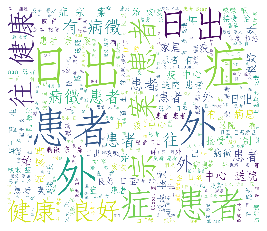

In [8]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
font_path = r'E:\Intern_DataVisualization\group4\wordcloud\simfang.ttf'
list1 = dfSg['word'].values.tolist()
seg_list=' '.join([str(elem) for elem in list1])
wc = WordCloud(background_color="white",width=1000, height=860, margin=2,font_path=font_path)
wc.generate(seg_list)
import matplotlib.pyplot as plt
plt.imshow(wc)
plt.axis("off")
plt.show()
wc.to_file('NLP(CH).png')